In [5]:
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [93]:
gsea_df = pd.read_csv('../exp/reactome_2019_GSEA.csv', index_col = 0)
wall_df = pd.read_csv('../exp/pathway_qvalues.csv', index_col = 0)
adj_wall_df = pd.read_csv('../exp/adjusted_distributions_intclust.csv', index_col = 0)

In [94]:
gsea_df

,IntClust 1,IntClust 2,IntClust 3,IntClust 4ER+,IntClust 4ER-,IntClust 5,IntClust 6,IntClust 7,IntClust 8,IntClust 9,IntClust 10
Term,,,,,,,,,,,
Assembly of collagen fibrils and other multimeric structures,1.049036,5.000000,0.974275,1.091789,1.454413,1.290681,2.389189,2.155206,1.311014,1.247610,0.281180
Collagen formation,1.065845,5.000000,0.921247,1.106857,1.371030,1.318862,1.864748,2.489428,2.139396,1.042726,0.533042
ERCC6 (CSB) and EHMT2 (G9a) positively regulate rRNA expression,5.000000,5.000000,0.702047,3.921659,1.824260,0.681053,0.947119,0.882207,0.158313,1.426278,0.228067
Extracellular matrix organization,1.039957,5.000000,0.569958,1.174228,1.392991,1.793119,1.433723,2.560484,1.983980,1.124677,0.297436
Formation of the beta-catenin:TCF transactivating complex,5.000000,5.000000,0.333310,1.551012,1.056790,0.327395,1.368881,1.455199,0.159023,0.498590,0.211528
...,...,...,...,...,...,...,...,...,...,...,...
Fatty Acids bound to GPR40 (FFAR1) regulate insulin secretion,0.027351,0.002196,0.060462,0.159961,0.266451,0.514934,0.167321,0.061277,0.094445,0.292981,0.020899
Organic anion transport,0.024356,0.001971,0.075464,0.337015,0.161653,0.077474,0.029717,0.004938,0.270932,0.484075,0.025738
EGFR interacts with phospholipase C-gamma,0.214723,0.001959,0.945263,0.295748,0.829582,0.863329,0.103600,2.376585,1.111008,0.062164,0.941156


In [95]:
new_name = {}
for i in gsea_df.columns:
    new_i = i.lstrip('IntClust ')
    new_name[i] = new_i
print(new_name)
gsea_df = gsea_df.rename(columns = new_name)


gsea_df_counts = {}

for column in gsea_df.columns:
    columnshape = gsea_df[gsea_df[column] >= 3].shape[0]
    gsea_df_counts[column] = columnshape

{'IntClust 1': '1', 'IntClust 2': '2', 'IntClust 3': '3', 'IntClust 4ER+': '4ER+', 'IntClust 4ER-': '4ER-', 'IntClust 5': '5', 'IntClust 6': '6', 'IntClust 7': '7', 'IntClust 8': '8', 'IntClust 9': '9', 'IntClust 10': '10'}


In [96]:
gsea_df_counts

{'1': 193,
 '2': 29,
 '3': 85,
 '4ER+': 191,
 '4ER-': 21,
 '5': 5,
 '6': 16,
 '7': 105,
 '8': 51,
 '9': 9,
 '10': 88}

In [97]:
wall_df_counts = {}

for column in wall_df.columns:
    columnshape = wall_df[wall_df[column] >= 3].shape[0]
    wall_df_counts[column] = columnshape
    

In [98]:
adj_wall_df_counts = {}
for column in adj_wall_df.columns:
    columnshape = adj_wall_df[adj_wall_df[column] >= 3].shape[0]
    adj_wall_df_counts[column] = columnshape

new_name = {}
for i in adj_wall_df.columns:
    if i != 'cluster 4ER- log adjusted q-value':
        new_i = i.lstrip('cluster ')
        new_i = new_i.rstrip(' log adjusted q-value')
    else:
        new_i = '4ER-'
    new_name[i] = new_i
print(new_name)
adj_wall_df = adj_wall_df.rename(columns = new_name)

adj_wall_df_counts = {}
for column in adj_wall_df.columns:
    columnshape = adj_wall_df[adj_wall_df[column] >= 3].shape[0]
    adj_wall_df_counts[column] = columnshape
adj_wall_df.columns

{'cluster 4ER+ log adjusted q-value': '4ER+', 'cluster 9 log adjusted q-value': '9', 'cluster 7 log adjusted q-value': '7', 'cluster 3 log adjusted q-value': '3', 'cluster 8 log adjusted q-value': '8', 'cluster 10 log adjusted q-value': '10', 'cluster 1 log adjusted q-value': '1', 'cluster 2 log adjusted q-value': '2', 'cluster 5 log adjusted q-value': '5', 'cluster 4ER- log adjusted q-value': '4ER-', 'cluster 6 log adjusted q-value': '6'}


Index(['4ER+', '9', '7', '3', '8', '10', '1', '2', '5', '4ER-', '6'], dtype='object')

In [99]:
adj_wall_df

,4ER+,9,7,3,8,10,1,2,5,4ER-,6
RMTs methylate histone arginines,0.758568,0.054406,0.039849,0.099775,0.075451,0.327460,18.721794,0.365473,0.018053,0.139626,0.020571
HDMs demethylate histones,0.466298,0.091224,0.150271,0.224870,0.049012,0.165633,17.008346,0.378548,0.030516,0.029626,0.020571
Senescence-Associated Secretory Phenotype (SASP),0.835548,0.064950,0.037017,0.049357,0.075451,0.326805,16.956480,0.270782,0.007901,0.177529,0.020162
Cellular Senescence,1.233537,0.175954,0.277561,0.242471,0.081375,0.036483,16.956480,0.058689,0.027167,0.211400,0.020571
Nucleosome assembly,1.503196,0.123956,0.112440,0.087088,0.078105,0.084186,16.721409,0.127614,0.002992,0.396395,0.020571
...,...,...,...,...,...,...,...,...,...,...,...
phospho-PLA2 pathway,0.130170,0.004654,0.175178,0.067441,0.110972,0.054425,0.001189,0.524331,0.011144,0.424767,0.007124
"Gamma carboxylation, hypusine formation and arylsulfatase activation",0.585604,0.196309,1.572381,0.205893,0.814993,0.218627,0.000854,0.185032,0.188570,0.567200,0.014141
Signal regulatory protein family interactions,1.556170,0.123956,0.730298,0.208476,0.962233,0.190589,0.000661,0.062681,0.040868,2.501311,0.020571
Scavenging by Class B Receptors,0.952911,0.316602,0.092131,0.093823,0.136931,0.128289,0.000211,0.168478,0.137528,0.058631,0.000263


In [100]:
adj_wall_df_counts

{'4ER+': 150,
 '9': 14,
 '7': 65,
 '3': 126,
 '8': 1,
 '10': 170,
 '1': 254,
 '2': 6,
 '5': 37,
 '4ER-': 21,
 '6': 2}

In [101]:
anova_df_counts = {'1': 725, '2': 39, '3': 959, '4ER+': 1196, '4ER-': 961, '5': 650, '6': 218, '7': 1150, '8': 1313, '9': 581, '10': 1571}

C:\Users\patri\AppData\Roaming\Python\Python37\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


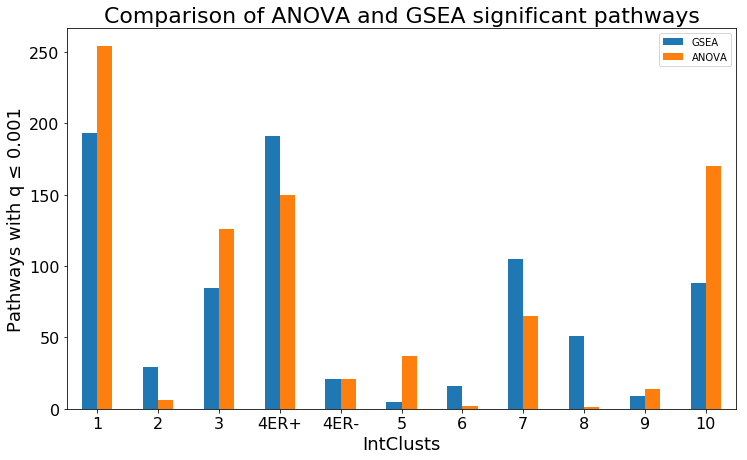

In [102]:
full_df = pd.DataFrame({'GSEA': gsea_df_counts, 'ANOVA': adj_wall_df_counts})
ax = full_df.plot.bar(rot=0, figsize=(12, 7))
ax.set_xlabel("IntClusts", fontsize=18)
ax.set_ylabel("Pathways with q ≤ 0.001", fontsize=18)
ax.set_title('Comparison of ANOVA and GSEA significant pathways', fontsize=22)
ax.tick_params(labelsize=16)
fig = ax.get_figure()
fig.show()

In [103]:
fig = ax.get_figure()
fig.savefig('gsea_wall_anova_comparison.png')

In [104]:
gsea_df

,1,2,3,4ER+,4ER-,5,6,7,8,9,10
Term,,,,,,,,,,,
Assembly of collagen fibrils and other multimeric structures,1.049036,5.000000,0.974275,1.091789,1.454413,1.290681,2.389189,2.155206,1.311014,1.247610,0.281180
Collagen formation,1.065845,5.000000,0.921247,1.106857,1.371030,1.318862,1.864748,2.489428,2.139396,1.042726,0.533042
ERCC6 (CSB) and EHMT2 (G9a) positively regulate rRNA expression,5.000000,5.000000,0.702047,3.921659,1.824260,0.681053,0.947119,0.882207,0.158313,1.426278,0.228067
Extracellular matrix organization,1.039957,5.000000,0.569958,1.174228,1.392991,1.793119,1.433723,2.560484,1.983980,1.124677,0.297436
Formation of the beta-catenin:TCF transactivating complex,5.000000,5.000000,0.333310,1.551012,1.056790,0.327395,1.368881,1.455199,0.159023,0.498590,0.211528
...,...,...,...,...,...,...,...,...,...,...,...
Fatty Acids bound to GPR40 (FFAR1) regulate insulin secretion,0.027351,0.002196,0.060462,0.159961,0.266451,0.514934,0.167321,0.061277,0.094445,0.292981,0.020899
Organic anion transport,0.024356,0.001971,0.075464,0.337015,0.161653,0.077474,0.029717,0.004938,0.270932,0.484075,0.025738
EGFR interacts with phospholipase C-gamma,0.214723,0.001959,0.945263,0.295748,0.829582,0.863329,0.103600,2.376585,1.111008,0.062164,0.941156


In [105]:
compare_sig_pathways = {}
for i in gsea_df.columns:
    print(i)
    gsea_cluster = gsea_df[gsea_df[i] > 3].index.tolist()
    anova_cluster = adj_wall_df[adj_wall_df[i] > 3].index.tolist()
    count = 0
    for index in anova_cluster:
        if index in gsea_cluster:
            count += 1
    compare_sig_pathways[i] = count

compare_sig_pathways

1
2
3
4ER+
4ER-
5
6
7
8
9
10


{'1': 121,
 '2': 0,
 '3': 44,
 '4ER+': 63,
 '4ER-': 0,
 '5': 0,
 '6': 0,
 '7': 0,
 '8': 0,
 '9': 0,
 '10': 49}

In [106]:
adj_wall_df_counts["1"]

254

In [107]:
gsea_df_counts["1"]

193

In [108]:
venn_dict = {}
for i in compare_sig_pathways.keys():
    venn_list = [adj_wall_df_counts[i]-compare_sig_pathways[i], gsea_df_counts[i] - compare_sig_pathways[i], compare_sig_pathways[i]]
    venn_dict[i] = venn_list
venn_dict                                                                                                       

{'1': [133, 72, 121],
 '2': [6, 29, 0],
 '3': [82, 41, 44],
 '4ER+': [87, 128, 63],
 '4ER-': [21, 21, 0],
 '5': [37, 5, 0],
 '6': [2, 16, 0],
 '7': [65, 105, 0],
 '8': [1, 51, 0],
 '9': [14, 9, 0],
 '10': [121, 39, 49]}

In [ ]:
adj_wall_df.sort_values(by="8", ascending=False)

In [109]:
for i in venn_dict.keys():
    anova = int(venn_dict[i][0])
    overlap = int(venn_dict[i][2])
    sum_ = anova + overlap
    print(i)
    if overlap != 0:
        print((overlap/sum_)*100)

1
47.63779527559055
2
3
34.92063492063492
4ER+
42.0
4ER-
5
6
7
8
9
10
28.823529411764703


In [110]:
for i in venn_dict.keys():
    print(f"cluster {i}")
    print(venn_dict[i][1]-venn_dict[i][2])
    print(venn_dict[i][0]-venn_dict[i][2])
    print(venn_dict[i][2])
    print("")

cluster 1
-49
12
121

cluster 2
29
6
0

cluster 3
-3
38
44

cluster 4ER+
65
24
63

cluster 4ER-
21
21
0

cluster 5
5
37
0

cluster 6
16
2
0

cluster 7
105
65
0

cluster 8
51
1
0

cluster 9
9
14
0

cluster 10
-10
72
49



In [111]:
overlap_df = pd.DataFrame({'GSEA': gsea_df_counts, 'ANOVA': adj_wall_df_counts, 'Overlap': compare_sig_pathways})

In [112]:
overlap_df = pd.DataFrame(index = gsea_df_counts.keys())
overlap_df['Overlap'] = compare_sig_pathways.values()
overlap_df['GSEA'] = gsea_df_counts.values() 
overlap_df['ANOVA'] = adj_wall_df_counts.values() 
overlap_df['GSEA exclusive'] = overlap_df['GSEA'] - overlap_df['Overlap']
overlap_df['ANOVA exclusive'] = overlap_df['ANOVA'] - overlap_df['Overlap']

overlap_df

,Overlap,GSEA,ANOVA,GSEA exclusive,ANOVA exclusive
1,121,193,150,72,29
2,0,29,14,29,14
3,44,85,65,41,21
4ER+,63,191,126,128,63
4ER-,0,21,1,21,1
5,0,5,170,5,170
6,0,16,254,16,254
7,0,105,6,105,6
8,0,51,37,51,37
9,0,9,21,9,21
